In [1]:
import sys
sys.path.append('../cmake-build-release-gcc/src/python/')
import pyslise as ps
p = ps.Pyslise(
    lambda x: 9*exp(-2*x)-18*exp(-x), 0, 30, tolerance=1e-3)

In [5]:
e = p.computeEigenvaluesByIndex(0,10, (0,1), (0,1))
e

[(0, -3.6680945618899554),
 (1, -0.5503475251295666),
 (2, 0.012318309698130425),
 (3, 0.05015199925652519),
 (4, 0.11463110925041456),
 (5, 0.20579974353236513),
 (6, 0.32303640353807184),
 (7, 0.4656198810935693),
 (8, 0.6329354807161195),
 (9, 0.8245002673752694)]

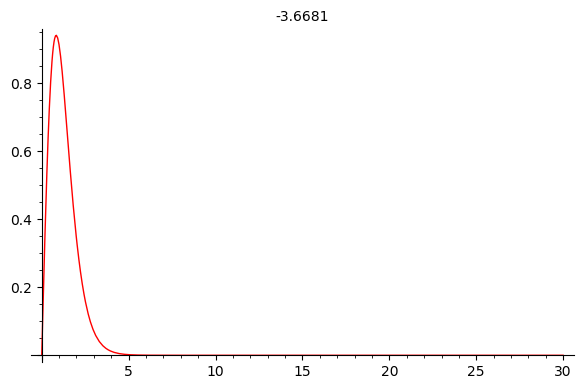

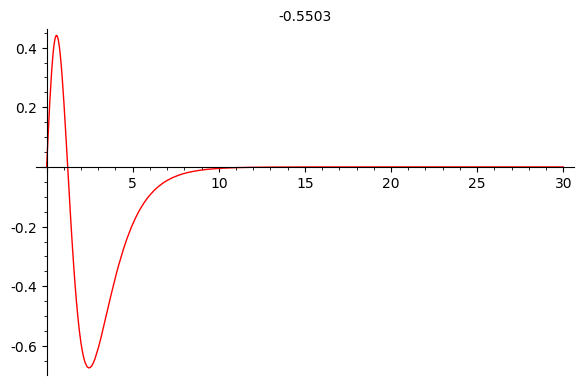

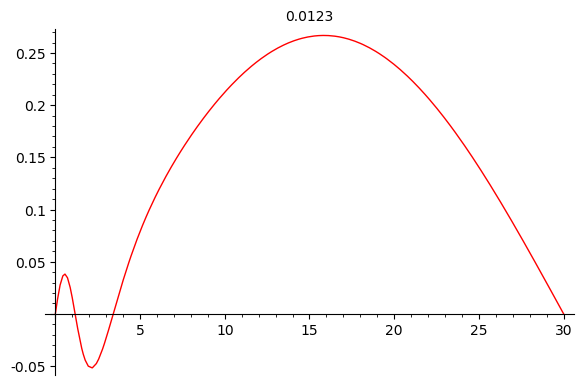

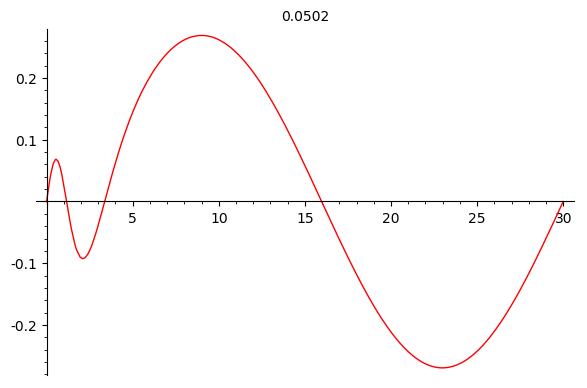

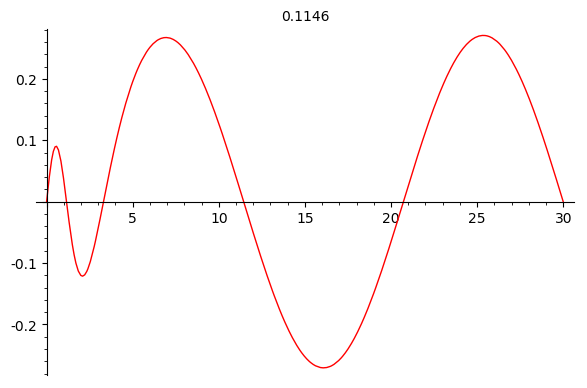

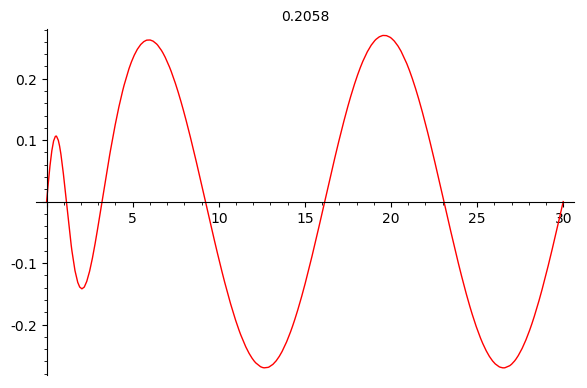

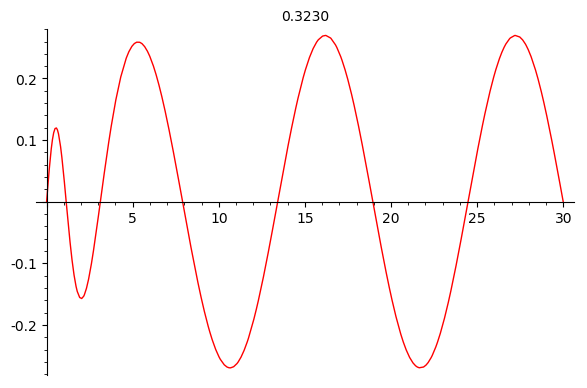

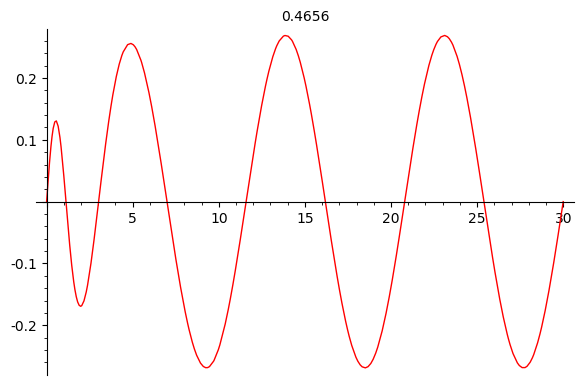

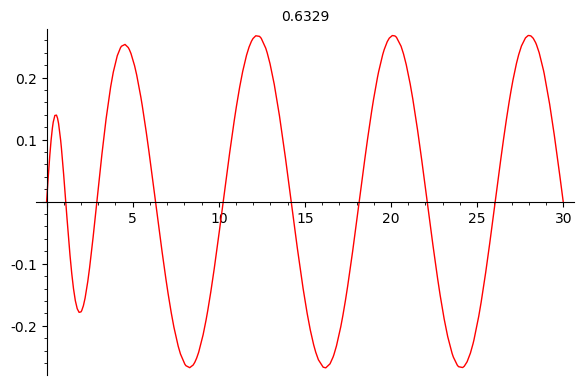

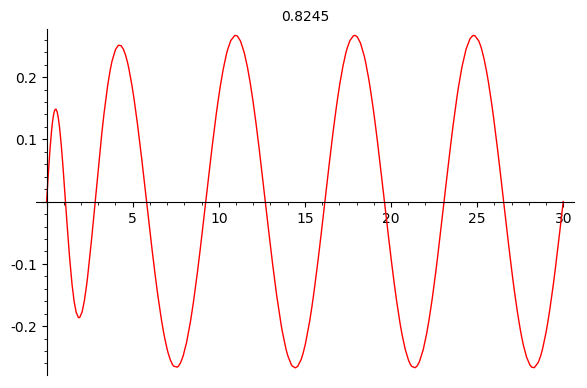

In [6]:
for i,E in e:
    f = p.eigenfunctionCalculator(E, (0,1), (0,1))
    plot(lambda x: f(x)[0], (0, 30), color="red", title="%.4f"%E).show()

In [2]:
def getErrorF(scs, backward=False):
    return lambda E: matrix(
        scs.propagate(
            E,
            (matrix.zero(4,4), matrix.identity(4,4)),
            1 if backward else .1,
            .1 if backward else 1
        )[0][0]).det()

def V(x):
    return [[cos(x)/max(i, j) + (1/x^i if i == j else 0) for j in [1..4]] for i in [1..4]]

intervals = [(14,16),(16,19),(21,22),(26,28),(50,54),(54,58),(64,70), (84, 86)]

def find_eigenvalues(scs, **kwargs):    
    eigs = []
    for (a, b) in intervals:
        try:
            eigs.append(find_root(getErrorF(scs, **kwargs), a, b))
        except:
            eigs.append(NaN)
    return eigs

scs = ps.Pyscs(V, 4, 0.1, 1, 128)
eigenvalues = find_eigenvalues(scs)

def calculate_errors(scs, **kwargs):
    return [RDF(abs(c-e)) for c, e in zip(find_eigenvalues(scs, **kwargs), eigenvalues)]

In [4]:
data = [calculate_errors(ps.Pyscs(V, 4, 0.1, 1, 2^k), backward=False) for k in [0 .. 6]]
data = zip(*data)
show(table(data))
steps = []
for r in data:
    steps.append([])
    for i in range(1, len(r)):
        steps[-1].append(RDF(log(r[i-1]/r[i])/log(2)))
show(table(steps))

,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,


,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,


In [4]:
data = [calculate_errors(ps.Pyscs(V, 4, .1, 1, 2^k), backward=True) for k in [0 .. 6]]
data = zip(*data)
show(table(data))
steps = []
for r in data:
    steps.append([])
    for i in range(1, len(r)):
        steps[-1].append(RDF(log(r[i-1]/r[i])/log(2)))
show(table(steps))

,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,


,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,


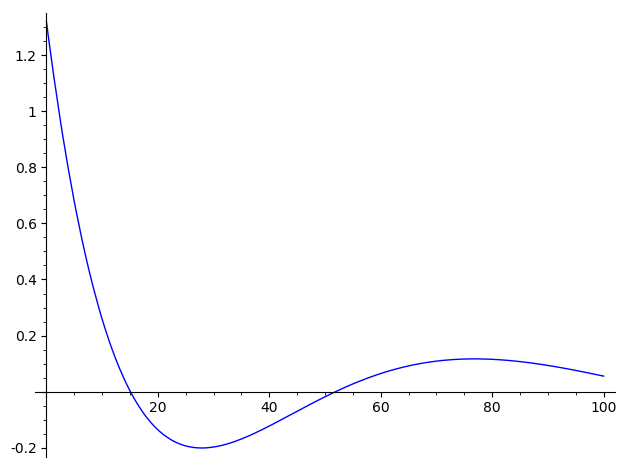

In [5]:
scs = ps.Pyscs(V, 4, 0.1, 1, 5)
plot(lambda E: matrix(RDF, scs.propagate(E, [matrix.zero(4), matrix.identity(4)], .1, 1)[0][0])[0,0],
     (0, 100))

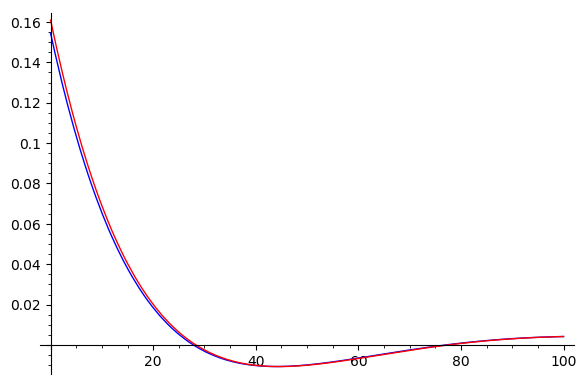

In [7]:
scs = ps.Pyscs(V, 4, 0.1, 1, 5)
s = 1
e = .1
h = 1
(plot(lambda E: 
     matrix(RDF,
            scs.propagate(
                E,
                [matrix.zero(4), matrix.identity(4)],
                s, e)[1][0])[0,0],
     (0, 100)) + 
plot(lambda E: 
     (scs.propagate(
                E,
                [matrix.zero(4), matrix.identity(4)],
                s, e)[0][0][0][0]
     - scs.propagate(
                E-h,
                [matrix.zero(4), matrix.identity(4)],
                s, e)[0][0][0][0])/h,
     (0, 100), color="red"))#.show(ymin=-1, ymax=1)

In [8]:
list_plot([(E, e) for E in [0,0.3 .. 100] for e in error(E)], ymax = 5, ymin=-5, figsize=[30,30])

NameError: name 'error' is not defined

In [6]:
def error1(E):
    l, dl = map(matrix, scs.propagate(E, (matrix.zero(4,4), matrix.identity(4,4)), 0.1, .5)[0])
    r, dr = map(matrix, scs.propagate(E,(matrix.zero(4,4), matrix.identity(4,4)), 1, .5)[0])
    return det(block_matrix([[l, r], [dl, dr]]))

def error2(E):
    left = matrix(scs.propagatePsi(E, matrix.zero(4,4), 0.1,.5))
    right = matrix(scs.propagatePsi(E, matrix.zero(4,4), 1, .5))
    return det(left-right)

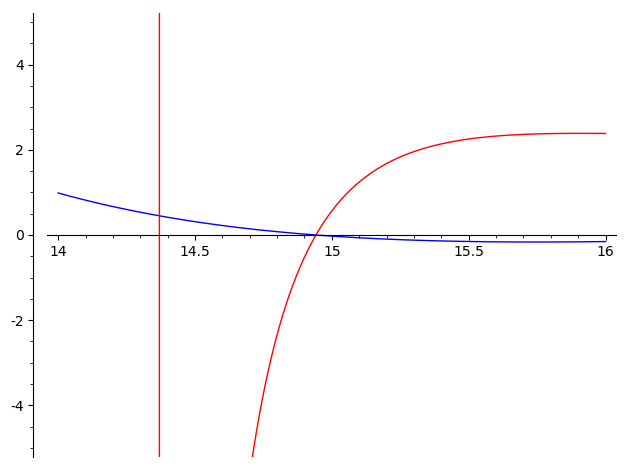

In [7]:
(plot(error1, (14, 16)) + plot(error2, (14, 16), color="red")).show(ymin=-5, ymax=5)

In [95]:
find_root(error2, 55,56)

55.7430968144823